# Phase 1 Data Preprocessing
## Justin Lusk & Joseph Princiotta

## Cleaning the Dataset

In [5]:
##### Import CSV data and set NA values

import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor

dfTest = pd.read_csv("Phishing_Legitimate_test_student.csv", na_values=['',' ','n/a'])
dfTrain = pd.read_csv("Phishing_Legitimate_train_missing_data.csv", na_values=['',' ','n/a'])


FileNotFoundError: [Errno 2] No such file or directory: 'Phishing_Legitimate_test_student.csv'

No data need to be encoded, even categorical data is float64/int

In [2]:
print(dfTrain.dtypes)

id                      int64
NumDots               float64
SubdomainLevel        float64
PathLevel             float64
UrlLength             float64
NumDash               float64
NumDashInHostname     float64
AtSymbol              float64
TildeSymbol           float64
NumUnderscore         float64
NumPercent            float64
NumQueryComponents    float64
NumAmpersand          float64
NumHash               float64
NumNumericChars       float64
NoHttps               float64
RandomString          float64
IpAddress             float64
DomainInSubdomains    float64
DomainInPaths         float64
HttpsInHostname       float64
HostnameLength        float64
PathLength            float64
QueryLength           float64
DoubleSlashInPath     float64
NumSensitiveWords     float64
EmbeddedBrandName     float64
PctExtResourceUrls    float64
ExtFavicon            float64
InsecureForms         float64
RelativeFormAction    float64
ExtFormAction         float64
AbnormalFormAction    float64
RightClick

#### Total missing/NA values of Training data

In [3]:
print(dfTrain.isnull().sum())
print(dfTrain.isnull().any(axis=0))
print(dfTrain.isnull().any(axis=1))
trainRowsWithNa = dfTrain[ dfTrain.isnull().any(axis=1) ]
print(trainRowsWithNa)

id                    0
NumDots               1
SubdomainLevel        1
PathLevel             1
UrlLength             6
NumDash               2
NumDashInHostname     4
AtSymbol              3
TildeSymbol           3
NumUnderscore         2
NumPercent            3
NumQueryComponents    4
NumAmpersand          3
NumHash               5
NumNumericChars       4
NoHttps               2
RandomString          2
IpAddress             2
DomainInSubdomains    2
DomainInPaths         3
HttpsInHostname       2
HostnameLength        7
PathLength            6
QueryLength           6
DoubleSlashInPath     5
NumSensitiveWords     5
EmbeddedBrandName     5
PctExtResourceUrls    8
ExtFavicon            5
InsecureForms         5
RelativeFormAction    5
ExtFormAction         5
AbnormalFormAction    5
RightClickDisabled    5
PopUpWindow           5
IframeOrFrame         5
MissingTitle          5
ImagesOnlyInForm      5
CLASS_LABEL           0
dtype: int64
id                    False
NumDots                

#### Confirm no missing/NA values of Test data (NONE)

In [4]:
print(dfTest.isnull().sum())
print(dfTest.isnull().any(axis=0))
print(dfTest.isnull().any(axis=1))

id                    0
NumDots               0
SubdomainLevel        0
PathLevel             0
UrlLength             0
NumDash               0
NumDashInHostname     0
AtSymbol              0
TildeSymbol           0
NumUnderscore         0
NumPercent            0
NumQueryComponents    0
NumAmpersand          0
NumHash               0
NumNumericChars       0
NoHttps               0
RandomString          0
IpAddress             0
DomainInSubdomains    0
DomainInPaths         0
HttpsInHostname       0
HostnameLength        0
PathLength            0
QueryLength           0
DoubleSlashInPath     0
NumSensitiveWords     0
EmbeddedBrandName     0
PctExtResourceUrls    0
ExtFavicon            0
InsecureForms         0
RelativeFormAction    0
ExtFormAction         0
AbnormalFormAction    0
RightClickDisabled    0
PopUpWindow           0
IframeOrFrame         0
MissingTitle          0
ImagesOnlyInForm      0
dtype: int64
id                    False
NumDots               False
SubdomainLevel     

### Identify rows with missing values and create threshold to drop rows

Identify rows with > 1 missing values for imputation

In [5]:
rowsToDrop = dfTrain[ dfTrain.isnull().sum(axis=1) > 1 ].index
print(rowsToDrop.shape)
print(rowsToDrop)

# Drop rows with > 1 N/A's
dfTrain.drop(rowsToDrop, inplace=True)
print(dfTrain.shape)

(10,)
Int64Index([6, 902, 979, 1759, 1820, 2775, 2776, 2777, 2778, 2779], dtype='int64')
(4990, 39)


## Data Imputation

### Data imputation method : KNN
KNN was chosen because it offers the benifits of finding rows similar to missing data, this method is best used with enough good data points to calculate KNN from. This data has 5000 cases, plenty for KNN imputation. 

In [6]:
imputer = KNNImputer(n_neighbors=10)
# Create new dataframe
dfTrain2 = pd.DataFrame(imputer.fit_transform(dfTrain),columns = dfTrain.columns)
print(dfTrain2)
print(dfTrain2.shape)

          id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0        1.0      3.0             1.0        5.0       81.0      1.0   
1        2.0      2.0             0.0        5.0       78.0      1.0   
2        3.0      3.0             0.0        4.0       53.0      1.0   
3        4.0      3.0             1.0        6.0       68.0      0.0   
4        5.0      3.0             0.0        3.0       61.0      0.0   
...      ...      ...             ...        ...        ...      ...   
4985  4996.0      3.0             1.0        1.0       67.0      3.0   
4986  4997.0      1.0             0.0        2.0       36.0      1.0   
4987  4998.0      3.0             2.0        0.0       33.0      0.0   
4988  4999.0      3.0             1.0        2.0       47.0      0.0   
4989  5000.0      1.0             0.0        2.0       37.0      0.0   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                   1.0       0.0          0.0            1.0  ..

## Outlier Detection
### Manual Visual Outlier Detection & Visualization

<Figure size 640x480 with 0 Axes>

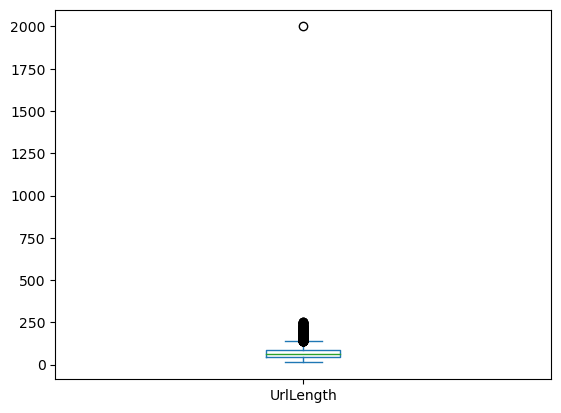

Int64Index([95], dtype='int64')
(4989, 39)


<Figure size 640x480 with 0 Axes>

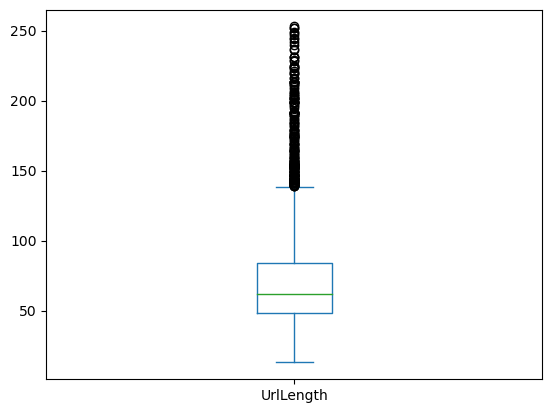

In [7]:
# Example of one heavy outlier for 'UrlLength'
plt.figure()
dfTrain2[['UrlLength']].plot.box()
plt.show()

# Drop big outlier row
# Should drop row with 'UrlLengh' > 500 because 1 data point > 1750 will skew data
rows_to_drop=dfTrain2[dfTrain2['UrlLength']>500].index
print(rows_to_drop)
# Drop rows where 'UrlLength' > 500
dfTrain2.drop(rows_to_drop,inplace=True)
print(dfTrain2.shape)

# Plog again after outlier removal
plt.figure()
dfTrain2[['UrlLength']].plot.box()
plt.show()

##### Manual removal of outliers for 'NumNumericChars'

<Figure size 640x480 with 0 Axes>

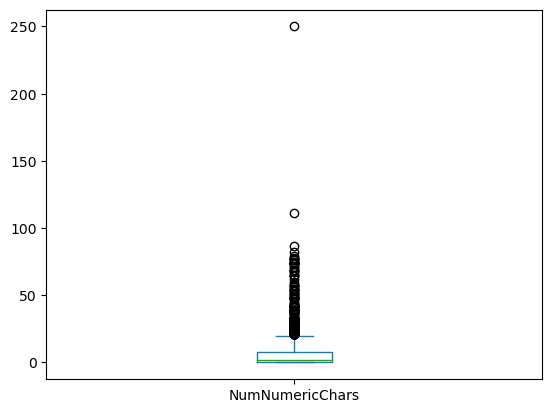

Int64Index([3132, 4854], dtype='int64')
(4987, 39)


<Figure size 640x480 with 0 Axes>

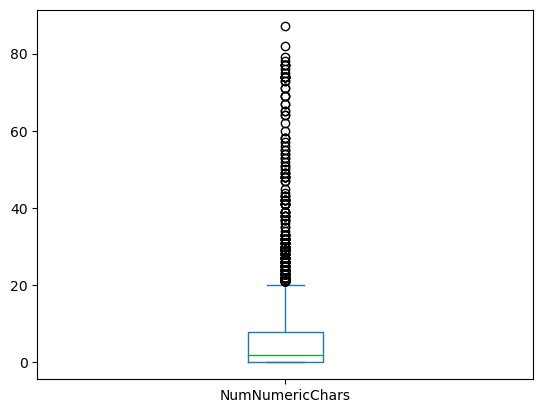

In [8]:
# Example of one heavy outlier for 'NumNumericChars'
plt.figure()
dfTrain2[['NumNumericChars']].plot.box()
plt.show()

# Drop big outlier row
# Should drop row with 'NumNumericChars' > 100 because 2 data points will skew data
rows_to_drop=dfTrain2[dfTrain2['NumNumericChars']>100].index
print(rows_to_drop)
# Drop rows where 'UrlLength' > 100
dfTrain2.drop(rows_to_drop,inplace=True)
print(dfTrain2.shape)

# Plog again after outlier removal
plt.figure()
dfTrain2[['NumNumericChars']].plot.box()
plt.show()

##### Manual removal of outliers for 'NumDash'

<Figure size 640x480 with 0 Axes>

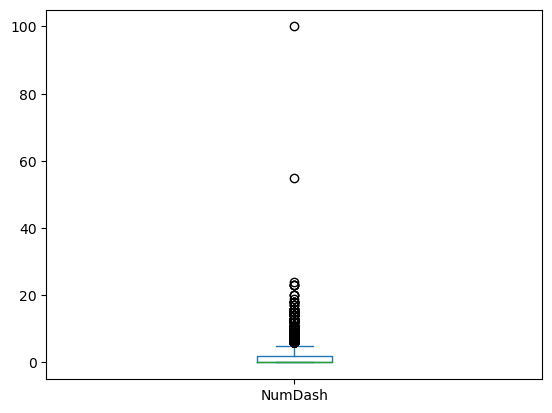

Int64Index([  13,   21,   33,   46,   71,  103,  143,  211,  246,  256,
            ...
            4631, 4657, 4675, 4693, 4761, 4810, 4821, 4855, 4907, 4966],
           dtype='int64', length=156)
(4831, 39)


<Figure size 640x480 with 0 Axes>

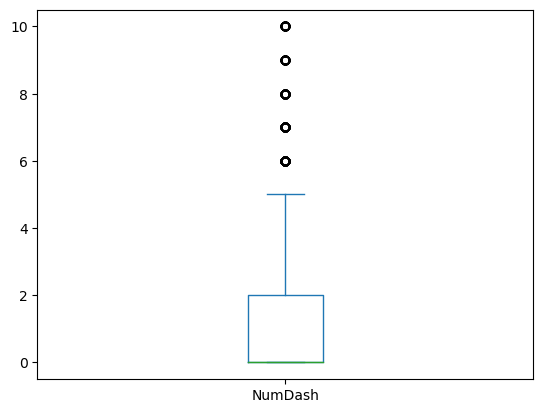

In [9]:
# Example of one heavy outlier for 'NumDash'
plt.figure()
dfTrain2[['NumDash']].plot.box()
plt.show()

# Drop big outlier row
# Should drop row with 'NumDash' > 10 because a few data points will skew data
rows_to_drop=dfTrain2[dfTrain2['NumDash']>10].index
print(rows_to_drop)
# Drop rows where 'NumDash' > 10
dfTrain2.drop(rows_to_drop,inplace=True)
print(dfTrain2.shape)

# Plog again after outlier removal
plt.figure()
dfTrain2[['NumDash']].plot.box()
plt.show()

#### Plots of Numerical Columns to show outliers for each column
 List of numerical columns: 'NumNumericChars','NumDots','SubdomainLevel','PathLevel','NumDash','NumDashInHostname',
'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords'

##### Create a DF of all numerical Columns in dfTrain2 & Plot to see outliers for each 

<Figure size 640x480 with 0 Axes>

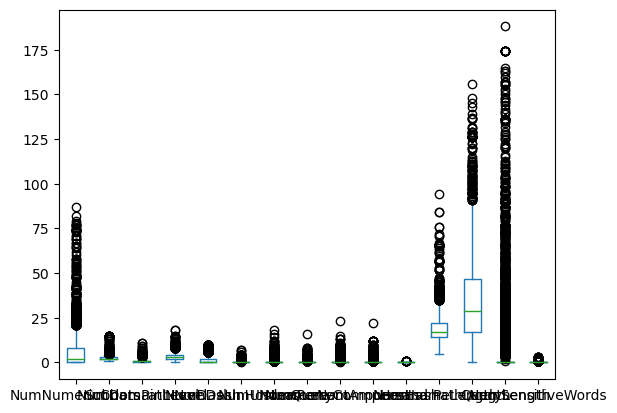

In [10]:
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','NumDash','NumDashInHostname',
          'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
plt.figure()
dfTrain2Numerical.plot.box()
plt.show()

### Automatic Outlier Detection
#### This should be done because 39 columns is too many to use manual outlier detection
##### Automatic Outlier detection should only be performed on numerical columns, binany data can't have outliers

(4831, 39)
[-1.1622788  -1.1070206  -0.98477601 ... -1.24256525 -1.00996932
 -0.98417123]
-1.5
[1 1 1 ... 1 1 1]
Int64Index([   0,    1,    3,    5,    9,   10,   12,   14,   15,   16,
            ...
            4977, 4978, 4980, 4981, 4982, 4983, 4984, 4985, 4987, 4988],
           dtype='int64', length=3774)
(1057, 39)


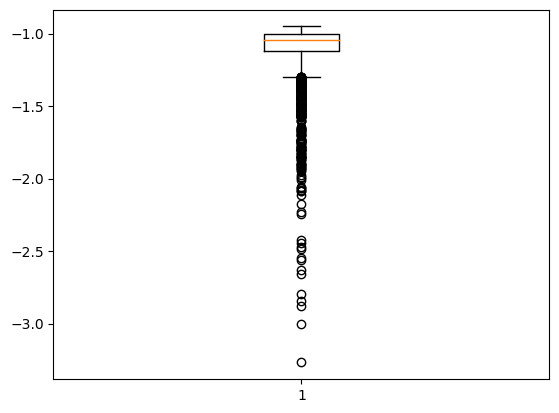

In [11]:
from sklearn.neighbors import LocalOutlierFactor
clf= LocalOutlierFactor(n_neighbors=20)
X=dfTrain2Numerical.to_numpy()
print(dfTrain2.shape)
# Find labels of outliers
outlier_label=clf.fit_predict(X)
print(clf.negative_outlier_factor_)
print(clf.offset_)
print(outlier_label)

plt.boxplot(clf.negative_outlier_factor_)

# Identify index of rows to drop
# Use threshold of -1.30, as -1.5 may leave too many outliers in

rows_to_drop= dfTrain2.iloc[clf.negative_outlier_factor_ < -1.30].index

# Drop rows with negative_outlier_factor < -1.30
print(rows_to_drop) # Index of rows that will be dropped from dfTrain2
dfTrain2.drop(rows_to_drop,inplace=True)
print(dfTrain2.shape)

Plot of Numerical data after removing outliers

In [2]:
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','NumDash','NumDashInHostname',
          'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
plt.figure()
dfTrain2Numerical.plot.box()
plt.show()

NameError: name 'dfTrain2' is not defined

## Data Standardization & Normalization

In [1]:
from sklearn.preprocessing import StandardScaler

X = dfTrain2Numerical.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized',
          'NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X
sns.boxplot(data=dfTrain2Numerical[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','NumDash','NumDashInHostname',
          'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']])
sns.boxplot(data=dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized',
          'NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']])


NameError: name 'dfTrain2Numerical' is not defined